In [24]:
import pandas as pd
import numpy as np
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
import matplotlib.pyplot as plt




# Data Load

In [25]:
# links_coeffs = {
#     0: [((0, -1), 0.7, lin_f), ((1, -1), -0.8, lin_f)],
#     1: [((1, -1), 0.8, lin_f), ((3, -1), 0.8, lin_f)],
#     2: [((2, -1), 0.5, lin_f), ((1, -2), 0.5, lin_f), ((3, -3), 0.6, lin_f)],
#     3: [((3, -1), 0.4, lin_f)]
# }

data = pd.read_pickle('tig_df.pkl')

# Drop NaN values
data = data.dropna()

# PCMCI Algorithm


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 4
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable x0 has 2 link(s):
        (x0 -1): max_pval = 0.00000, |min_val| =  0.803
        (x1 -1): max_pval = 0.00000, |min_val| =  0.731

    Variable x1 has 2 link(s):
        (x1 -1): max_pval = 0.00000, |min_val| =  0.697
        (x3 -1): max_pval = 0.00000, |min_val| =  0.477

    Variable x2 has 3 link(s):
        (x1 -2): max_pval = 0.00000, |min_val| =  0.559
        (x2 -1): max_pval = 0.00000, |min_val| =  0.476
        (x3 -3): max_pval = 0.00000, |min_val| =  0.178

    Variable x3 has 1 link(s):
        (x3 -1): max_pval = 0.00000, |min_val| =  0.406

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 4
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable

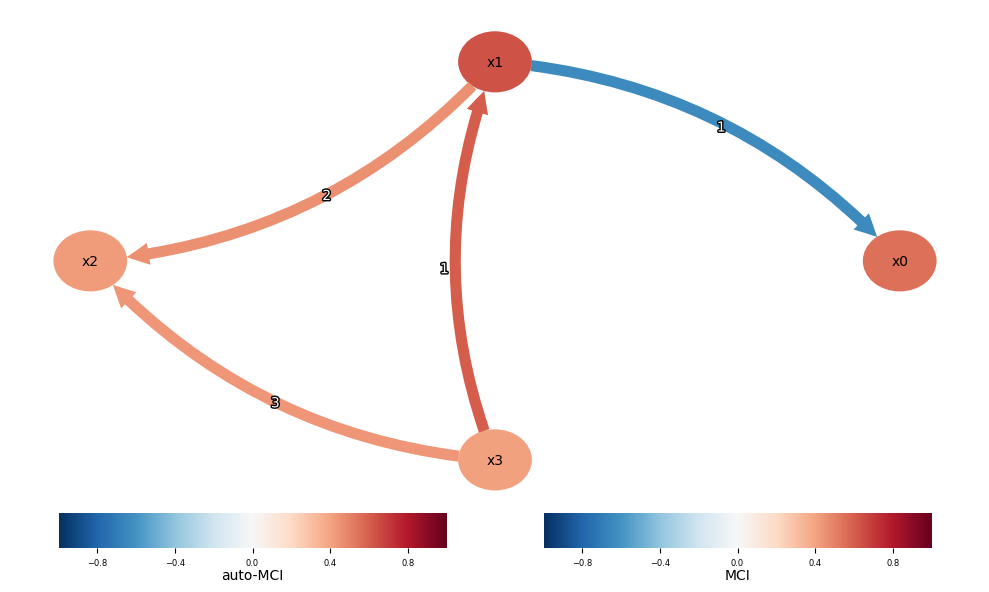

In [26]:
# Convert the DataFrame to the format required by tigramite
dataframe = pp.DataFrame(data.values, datatime=data.index, var_names=data.columns)

# Initialize PCMCI
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=parcorr, verbosity=1)

# Run PCMCI
results = pcmci.run_pcmci(tau_max=4, pc_alpha=0.05)

# # Print the results
# print("p-values:")
# print(results['p_matrix'].round(3))
# print("\nCausal effects:")
# print(results['val_matrix'].round(3))

# Visualize the results
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=data.columns,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    figsize=(10, 6)
)
plt.tight_layout()
plt.show()